In [ ]:
# INICIALMENTE SE HICO UN K-MEANS (MACHINE LEARNING LENGUAJE NO SUPERVISADO) PARA ANALIZAR LOS DATOS POR CLÚSTERS.
# PERO DEBIDO AL TIPO DE VARIABLES (muchos casos datos con valores 0-1-2..) 
# Y EL TIPO DE DATOS CREADOS CON EL DUMMY NO SE PUEDEN SACAR CONCLUSIONES CLARAS.
# POR ELLO SE CAMBIA DE IDEA POR UNA REGRESIÓN LINEAL MÚLTIPLE PARA PREDECIR SEGÚN EL PERFIL DE LA PERSONA CUANTA 
# CANTIDAD DE RESIDUOS ÚRBANOS GENERARÁ EN UN AÑO. 

#SE ANALIZAN 7 VARIABLES X PARA CADA Y (LOS DIFERENTES TIPOS DE RESIDUOS URBANOS). 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix


In [4]:
# DATAFRAME PARA EL DATASET DE LOS DATOS LIMPIOS DE LA TABLA USUARIOS-ACCIONES AGRUPADO ID_USUARIO.
df = pd.read_csv("tabla_k.csv")

In [8]:
df.head(1)

,basura_papel,basura_plastico,basura_resto,basura_organico,basura_cristal,edad,genero,estado_civil,hijos,tipo_vivienda,nivel_estudios,profesion,cant_aluminio,cant_plastico,cant_cristal,kg_papel,kg_organico
0,1,0,0,1,0,38,0,2,0,0,3,13,320,342,331,368.02,371.67


In [9]:
# SE DECIDEN ELIMINAR 4 COLUMNAS MÁS PARA EL ANÁLISIS.
df.drop(['basura_papel','basura_plastico','basura_resto','basura_organico','basura_cristal'],axis=1, inplace=True)

In [10]:
df.head()

,edad,genero,estado_civil,hijos,tipo_vivienda,nivel_estudios,profesion,cant_aluminio,cant_plastico,cant_cristal,kg_papel,kg_organico
0,38,0,2,0,0,3,13,320,342,331,368.02,371.67
1,25,0,0,0,0,3,1,381,366,366,386.77,414.66
2,24,0,0,0,0,7,8,378,382,347,430.92,409.58
3,19,0,0,0,3,5,8,332,340,349,389.79,344.34
4,41,0,0,0,0,4,17,323,319,318,397.94,376.39


array([[<AxesSubplot:xlabel='edad', ylabel='edad'>,
        <AxesSubplot:xlabel='genero', ylabel='edad'>,
        <AxesSubplot:xlabel='estado_civil', ylabel='edad'>,
        <AxesSubplot:xlabel='hijos', ylabel='edad'>,
        <AxesSubplot:xlabel='tipo_vivienda', ylabel='edad'>,
        <AxesSubplot:xlabel='nivel_estudios', ylabel='edad'>,
        <AxesSubplot:xlabel='profesion', ylabel='edad'>,
        <AxesSubplot:xlabel='cant_aluminio', ylabel='edad'>,
        <AxesSubplot:xlabel='cant_plastico', ylabel='edad'>,
        <AxesSubplot:xlabel='cant_cristal', ylabel='edad'>,
        <AxesSubplot:xlabel='kg_papel', ylabel='edad'>,
        <AxesSubplot:xlabel='kg_organico', ylabel='edad'>],
       [<AxesSubplot:xlabel='edad', ylabel='genero'>,
        <AxesSubplot:xlabel='genero', ylabel='genero'>,
        <AxesSubplot:xlabel='estado_civil', ylabel='genero'>,
        <AxesSubplot:xlabel='hijos', ylabel='genero'>,
        <AxesSubplot:xlabel='tipo_vivienda', ylabel='genero'>,
        <Axes

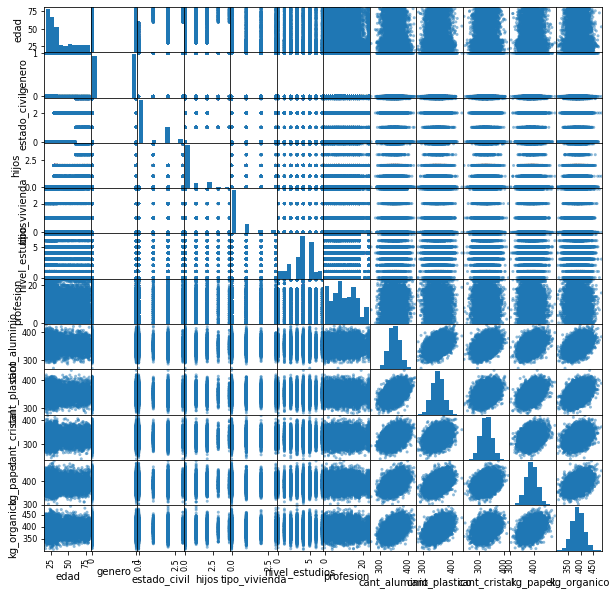

In [11]:
# MATRIZ SCATTERPLOTS CRUZADOS DE LAS VARIABLES CON HISTROGRAMA.
# Matriz simétrica. 
scatter_matrix(df, figsize = (10,10))

<AxesSubplot:>

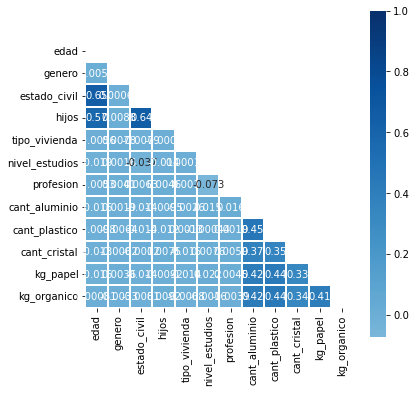

In [13]:
# MATRIZ CORRELACIÓN CON MAPA DE CALOR.
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=1, center=0, square=True, linewidths=.1, annot= True)

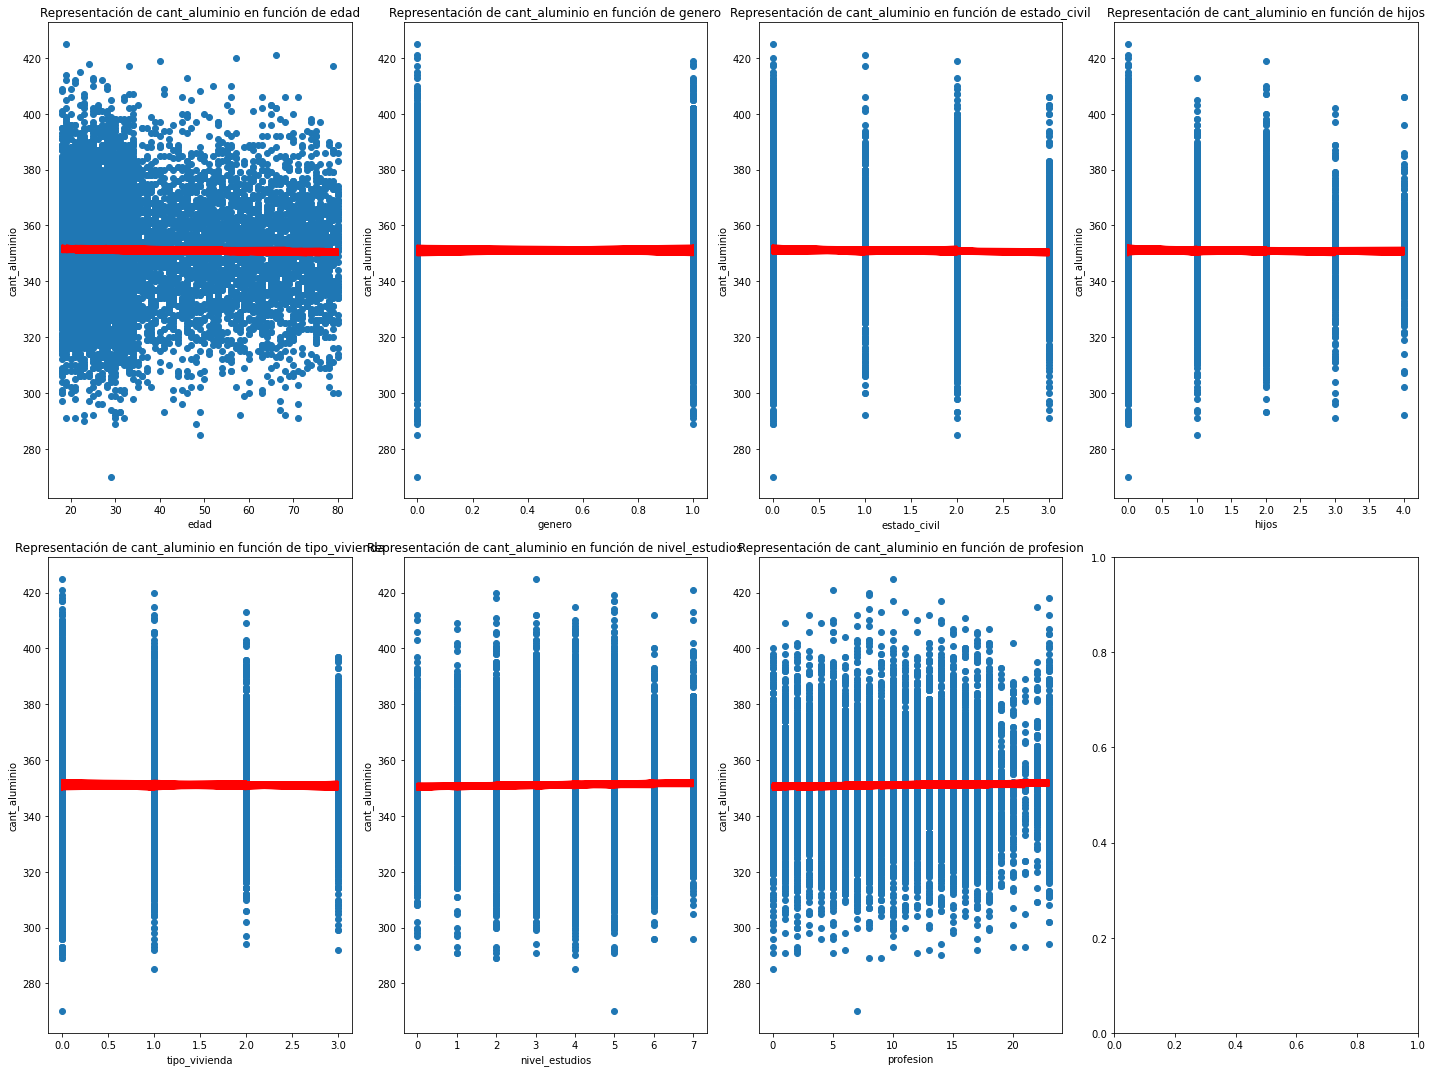

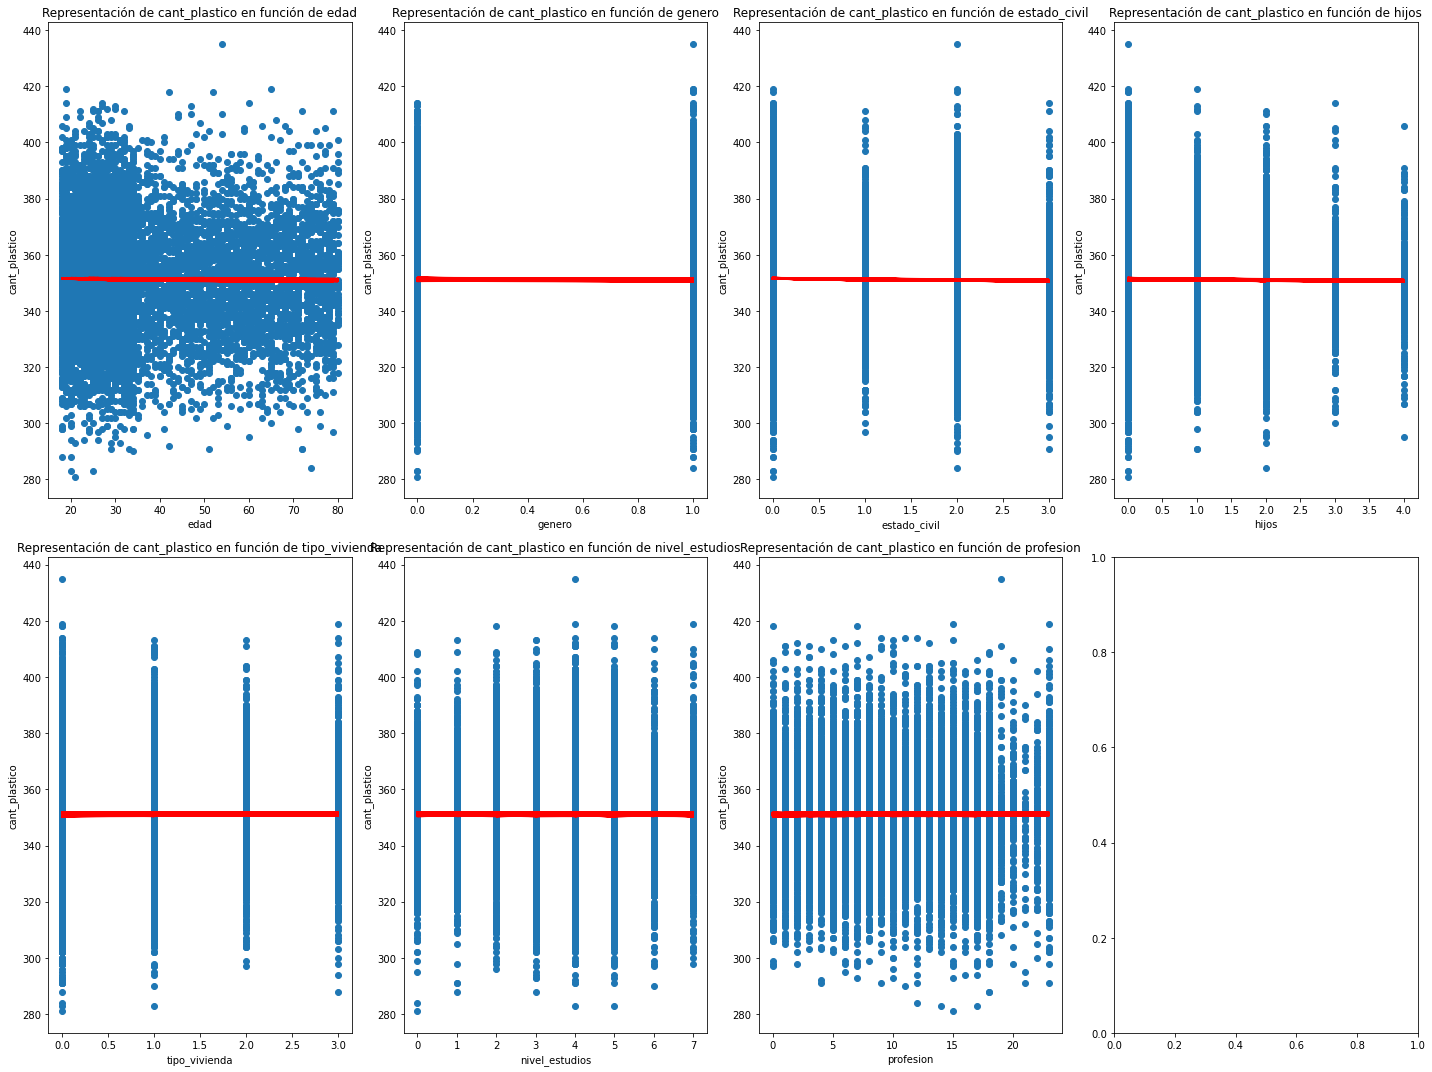

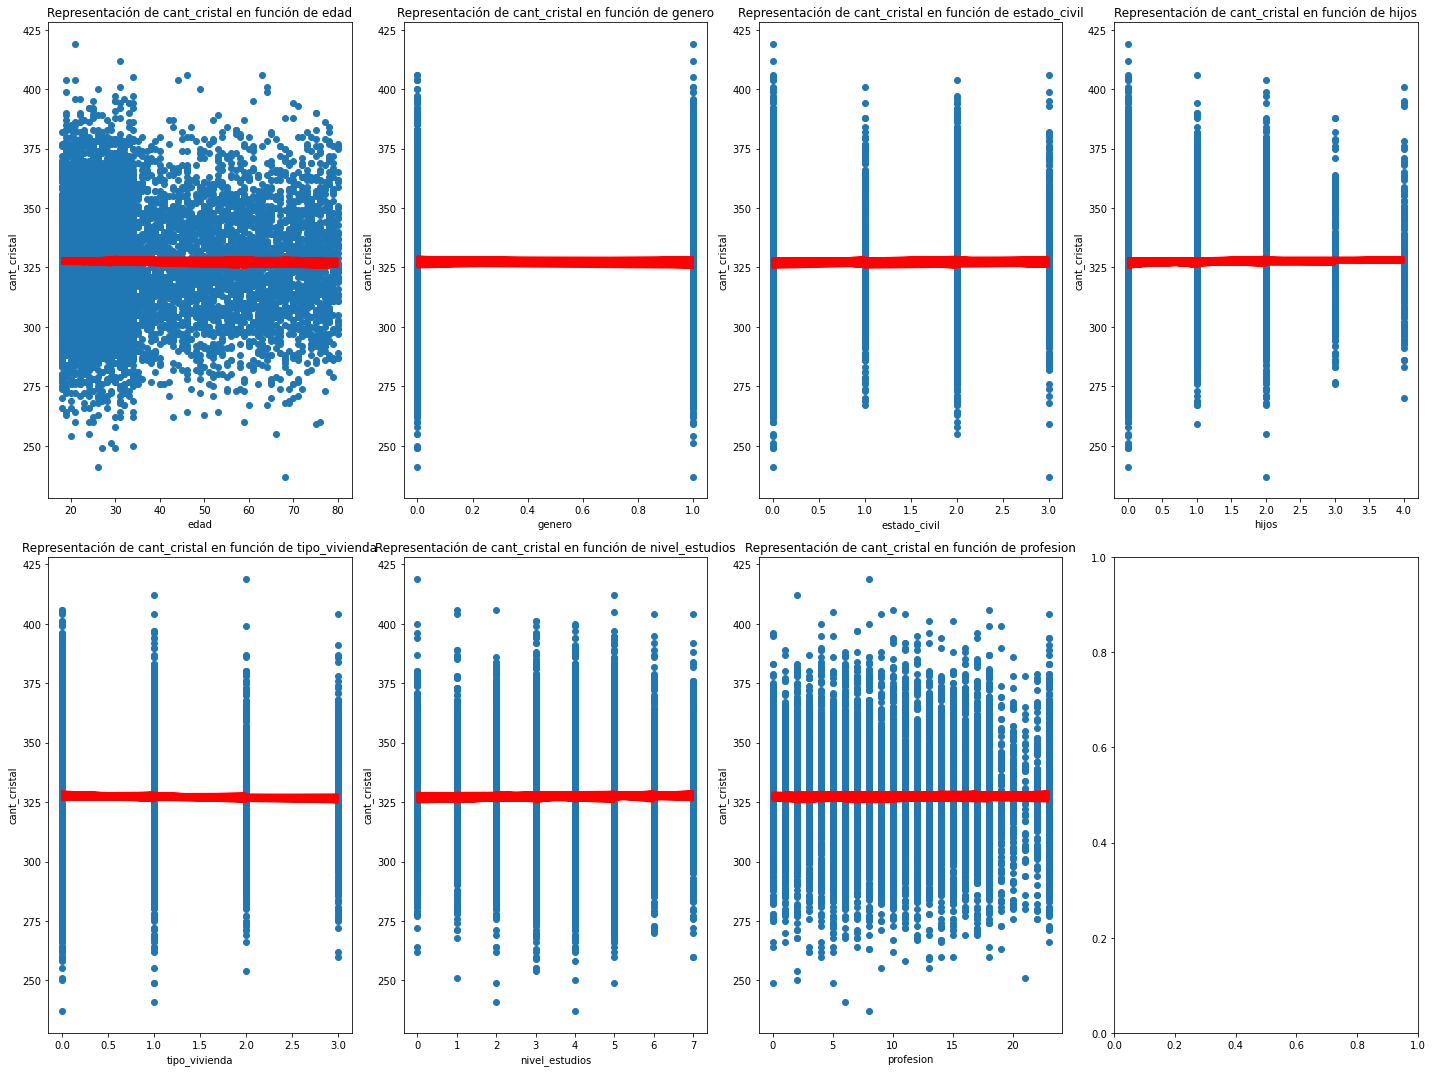

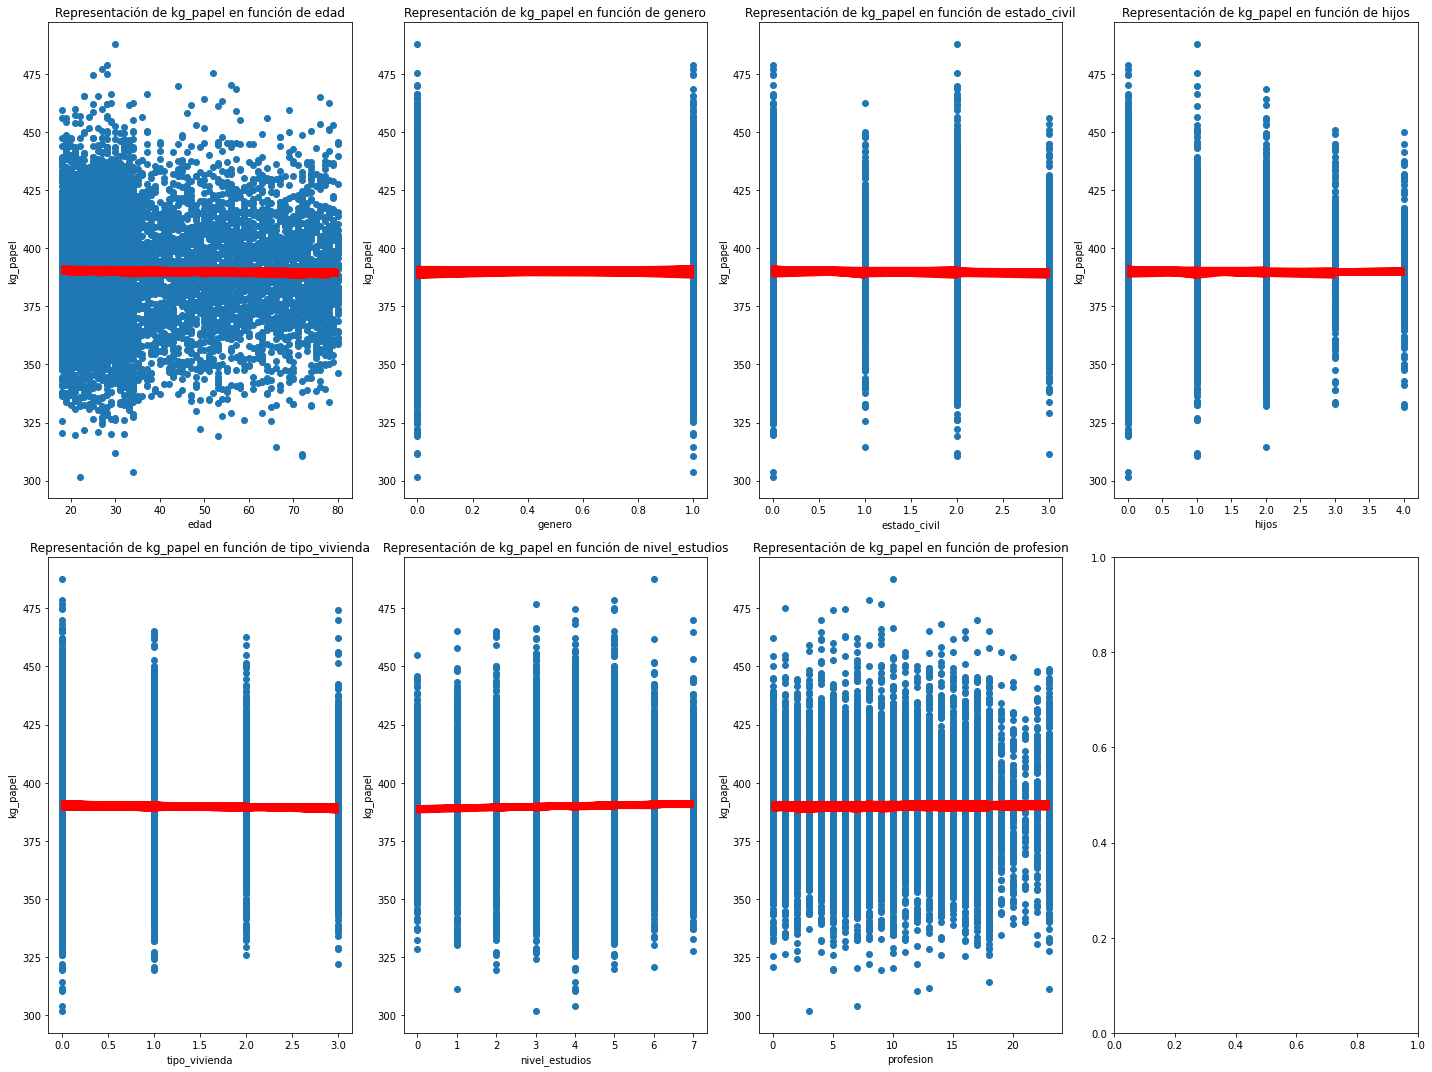

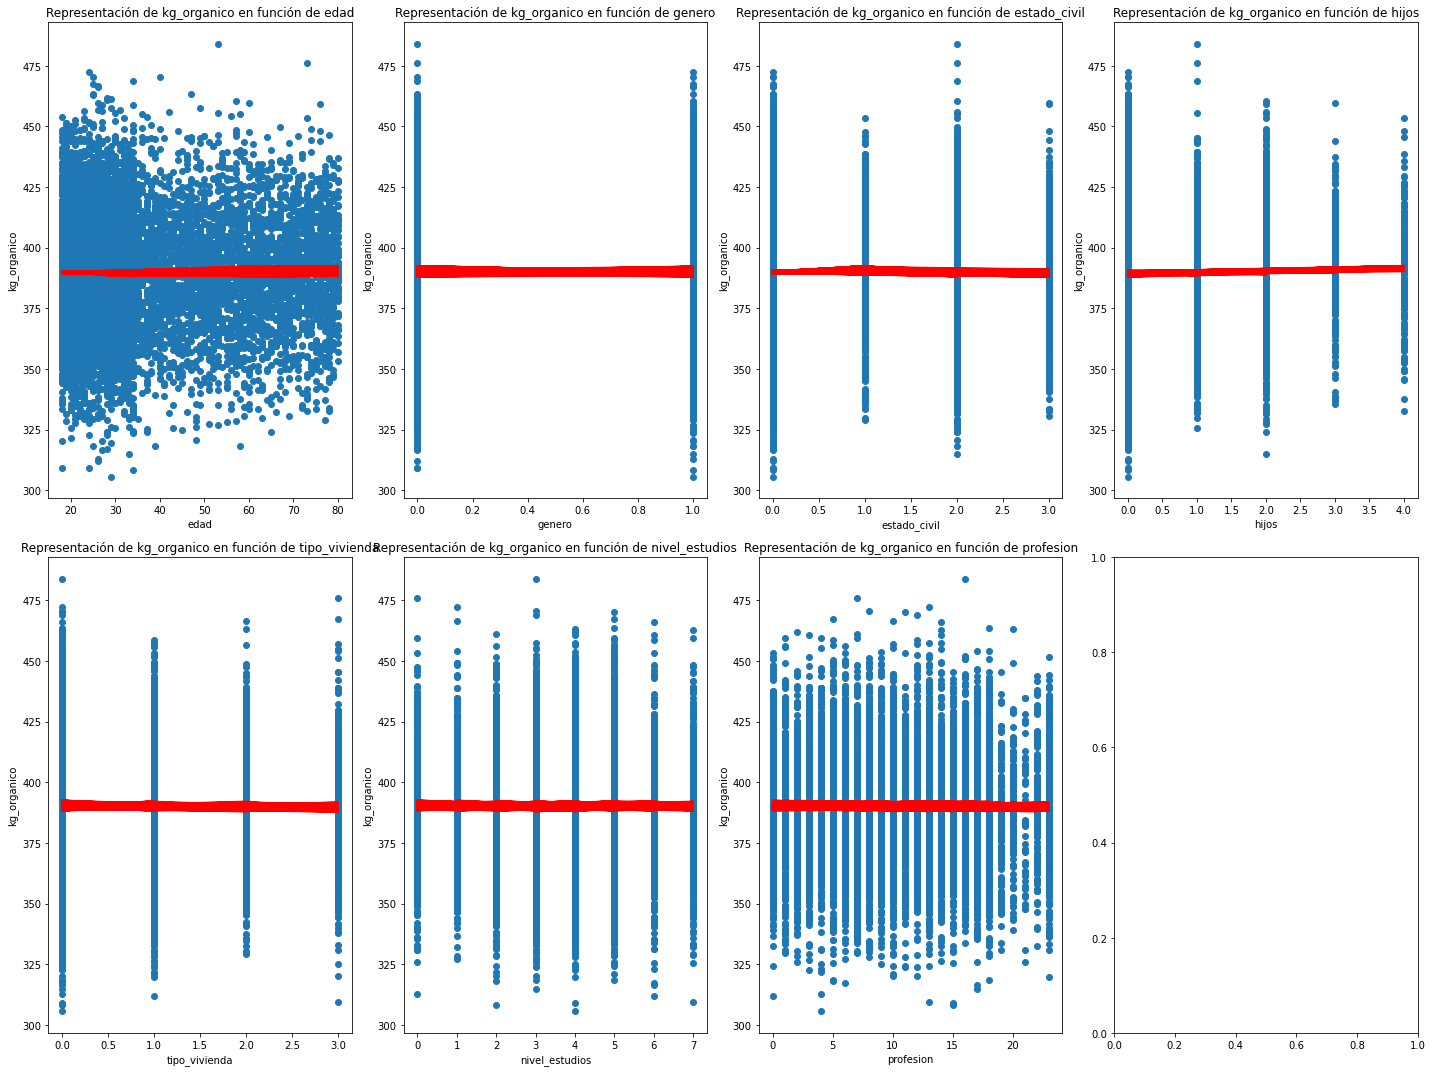

Variable Y: cant_aluminio
Coeficientes: [-0.01357998  0.07276793 -0.14185712  0.04602149 -0.06715928  0.1892207
  0.05381341]
Intercepto: 350.5396416443839
Error cuadrático medio: 384.60077056273514
R^2: 0.0008042170073913057

Variable Y: cant_plastico
Coeficientes: [ 1.81348540e-04 -2.54796015e-01 -2.22710243e-01 -1.01552889e-01
  3.09329400e-02 -9.25096163e-03  6.25890886e-03]
Intercepto: 351.63810787737725
Error cuadrático medio: 399.58820158179617
R^2: 0.0002544729181068739

Variable Y: cant_cristal
Coeficientes: [-0.03540623 -0.28313686  0.06061089  0.54521678 -0.43493648  0.11096457
  0.02313792]
Intercepto: 328.36640755544465
Error cuadrático medio: 534.7989857808983
R^2: 0.0008590006963300478

Variable Y: kg_papel
Coeficientes: [-0.01766684  0.1720342  -0.14377549  0.06244261 -0.41212088  0.31321671
  0.02260039]
Intercepto: 389.7227397099333
Error cuadrático medio: 551.3601858315469
R^2: 0.0010002478729946862

Variable Y: kg_organico
Coeficientes: [ 0.0060798  -0.16366714 -0.6

In [14]:
# APLICAMOS MODELO DE MACHINE LEARNING DE REGRESIÓN LINEAL MÚLTIPLE.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Definir las variables X e Y
variables_x = ['edad', 'genero', 'estado_civil', 'hijos', 'tipo_vivienda', 'nivel_estudios', 'profesion']
variable_y_list = ['cant_aluminio', 'cant_plastico', 'cant_cristal', 'kg_papel', 'kg_organico']

# Crear un diccionario para almacenar los resultados de cada modelo
resultados = {}

# Iterar sobre las variables Y
for variable_y in variable_y_list:
    # Obtener los datos correspondientes a las variables X e Y
    X = df[variables_x].values
    Y = df[variable_y].values

    # Crear un modelo de regresión lineal
    modelo = LinearRegression()

    # Entrenar el modelo con los datos
    modelo.fit(X, Y)

    # Realizar predicciones utilizando el modelo entrenado
    y_pred = modelo.predict(X)

    # Calcular el error cuadrático medio y el coeficiente de determinación R^2
    mse = mean_squared_error(Y, y_pred)
    r2 = r2_score(Y, y_pred)

    # Guardar los resultados en el diccionario
    resultados[variable_y] = {'Coeficientes': modelo.coef_, 'Intercepto': modelo.intercept_, 'Error cuadrático medio': mse, 'R^2': r2}

    # Crear una nueva figura y los subplots (3 filas, 4 columnas)
    f, axs = plt.subplots(2, 4, figsize=(20, 15))
    axs = axs.flatten()

    # Representar los puntos para cada variable X y para Y
    for i, x_var in enumerate(variables_x):
        axs[i].scatter(X[:, i], Y)
        axs[i].plot(X[:, i], y_pred, color='red')
        axs[i].set_title(f'Representación de {variable_y} en función de {x_var}')
        axs[i].set_xlabel(x_var)
        axs[i].set_ylabel(variable_y)

    # Mostrar la figura
    plt.tight_layout()
    plt.show()

# Imprimir los resultados
for variable_y, resultado in resultados.items():
    print('Variable Y:', variable_y)
    print('Coeficientes:', resultado['Coeficientes'])
    print('Intercepto:', resultado['Intercepto'])
    print('Error cuadrático medio:', resultado['Error cuadrático medio'])
    print('R^2:', resultado['R^2'])
    print()



In [15]:
# PROBAR CON EJEMPLOS INVENTADOS EL MODELO ENTRENADO.

import numpy as np
from sklearn.linear_model import LinearRegression
import joblib

# Definir las variables X e Y
variables_x = ['edad', 'genero', 'estado_civil', 'hijos', 'tipo_vivienda', 'nivel_estudios', 'profesion']
variable_y_list = ['cant_aluminio', 'cant_plastico', 'cant_cristal', 'kg_papel', 'kg_organico']

# Seleccionar un ejemplo para probar las predicciones
ejemplo = [25, 1, 1, 0, 1, 4, 20]

# Crear un diccionario para almacenar los modelos
modelos = {}

# Iterar sobre las variables Y
for variable_y in variable_y_list:
    # Obtener los datos correspondientes a las variables X e Y
    X = df[variables_x].values
    Y = df[variable_y].values

    # Crear un modelo de regresión lineal
    modelo = LinearRegression()

    # Entrenar el modelo con los datos
    modelo.fit(X, Y)

    # Guardar el modelo en el diccionario
    modelos[variable_y] = modelo

    # Realizar la predicción para el ejemplo
    prediccion = modelo.predict([ejemplo])

    # Imprimir el resultado de la predicción
    if variable_y in ['cant_aluminio', 'cant_plastico', 'cant_cristal']:
        print(f'Variable Y: {variable_y}')
        print(f'Predicción para el ejemplo: {int(prediccion[0])}')  # Convert to integer
    else:  # For 'kg_papel' and 'kg_organico', print with two decimals
        print(f'Variable Y: {variable_y}')
        print(f'Predicción para el ejemplo: {prediccion[0]:.2f}')
    print()





Variable Y: cant_aluminio
Predicción para el ejemplo: 351

Variable Y: cant_plastico
Predicción para el ejemplo: 351

Variable Y: cant_cristal
Predicción para el ejemplo: 327

Variable Y: kg_papel
Predicción para el ejemplo: 390.60

Variable Y: kg_organico
Predicción para el ejemplo: 389.03



In [16]:
# GUARDAR LOS 5 MODELOS ENTRENADOS CON JOBLIB 
import joblib
for variable_y, modelo in modelos.items():
    joblib.dump(modelo, f'modelo_{variable_y}.joblib')

print("Modelos guardados correctamente.")


Modelos guardados correctamente.
